In [ ]:
!pip install wordcloud

In [1]:
!pip install --upgrade transformers jax jaxlib

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 18.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 88.1/88.1 MB 5.7 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.26+cuda12.cudnn89
    Uninstalling jaxlib-0.4.26+cuda12.cudnn89:
      Successfully uninstalled jaxlib-0.4.26+cuda12.cudnn89
  Attempting uninstall: jax
    Found existing installation: jax 0.4.26
    Uninstalling jax-0.4.26:
      Successfully uninstalled jax-0.4.26


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import torch
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import Dataset

from tqdm.notebook import tqdm

from transformers import BertTokenizer

In [2]:
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dt = pd.read_csv('/content/drive/MyDrive/Competitions/–¶–ü –°–§–û/TRAIN_RES_1.csv')
dt.head(5)

achievements  \
0                                                NaN   
1                                                NaN   
2  –†–∞–±–æ—Ç—ã –Ω–µ –∑–∞–∫–æ–Ω—á–µ–Ω—ã, —Ç.–∫. –Ω–µ—Ç –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ –∂–µ–ª–∞–Ω...   
3                                                NaN   
4                                                NaN   

                               achievements_modified  \
0                                                NaN   
1                                                NaN   
2  –†–∞–±–æ—Ç—ã –Ω–µ –∑–∞–∫–æ–Ω—á–µ–Ω—ã, —Ç.–∫. –Ω–µ—Ç –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ –∂–µ–ª–∞–Ω...   
3                                                NaN   
4                                                NaN   

                                        company_name  \
0  –£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π –∑–∞—â–∏—Ç—ã –Ω–∞—Å–µ–ª–µ–Ω–∏—è –°–µ—Ä–¥–æ–±—Å...   
1                     –ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏—è –≥–æ—Ä–æ–¥–∞ –°–µ—Ä–¥–æ–±—Å–∫–∞   
2  —è–Ω–≤–∞—Ä—å 2016-–Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è–û–û–û ¬´–ê–†–¢–ï–õ–¨ –°–¢–ê–†–ê–¢–ï...   
3  –û–ê–û ¬´–í–∞—Å–∏–ª—å–µ–≤—Å–∫–∏–π —Ä—É–¥–Ω–∏–∫¬ª, –ø.–ú–æ—Ç—ã–≥–∏–Ω–æ, –ö—Ä–∞—Å–Ω–æ—è...   
4  –û–û–û ¬´–ê—Ä—Ç–µ–ª—å —Å—Ç–∞—Ä–∞—Ç–µ–ª–µ–π ¬´–¢–ê–õ¬ª¬ª, –£—Å—Ç—å-–ù–µ—Ä–∞, –†–µ—Å–ø...   

                                             demands  \
0  –†–∞–±–æ—Ç–∞–ª–∞,–Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ, —Å —Ñ–µ–¥–µ—Ä–∞–ª—å–Ω—ã–º–∏ –ª—å–≥–æ—Ç...   
1      –†–∞–±–æ—Ç–∞ —Å —Ä–µ–µ—Å—Ç—Ä–æ–º –º—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω–æ–π —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç–∏   
2  –ö—É—Ä–∏—Ä—É—é —Ä–∞–±–æ—Ç—ã –ø–æ —Ä—É–¥–Ω–æ–º—É –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—é: —Å–æ–∞–≤—Ç–æ—Ä...   
3        –ì–†–ü. –î–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—è –∫–µ—Ä–Ω–∞ —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã—Ö —Å–∫–≤–∞–∂–∏–Ω   
4  –ü–æ–∏—Å–∫–æ–≤–æ-—Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–µ —Ä–∞–±–æ—Ç—ã –Ω–∞ –º–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏–∏ —Ä...   

                                  id_cv  job_title  
0  52860148-26da-11e8-a184-9122a281f90e  –∏–Ω—Å–ø–µ–∫—Ç–æ—Ä  
1  52860148-26da-11e8-a184-9122a281f90e  –∏–Ω—Å–ø–µ–∫—Ç–æ—Ä  
2  e3c857b0-26a0-11e7-bcca-736ab11edb0c     –≥–µ–æ–ª–æ–≥  
3  e3c857b0-26a0-11e7-bcca-736ab11edb0c     –≥–µ–æ–ª–æ–≥  
4  e3c857b0-26a0-11e7-bcca-736ab11edb0c     –≥–µ–æ–ª–æ–≥

In [5]:
dt.size

12000000

In [6]:
dt = dt[:200000]

In [7]:
dt.size

1200000

## EDA

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   achievements           37618 non-null   object
 1   achievements_modified  37618 non-null   object
 2   company_name           199952 non-null  object
 3   demands                199058 non-null  object
 4   id_cv                  200000 non-null  object
 5   job_title              200000 non-null  object
dtypes: object(6)
memory usage: 9.2+ MB


In [ ]:
dt.describe()

achievements achievements_modified  \
count                                    37618                 37618   
unique                                   26875                 26861   
top     —É—Å–ø–µ—à–Ω–æ–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏–µ —Å–≤–æ–∏—Ö –æ–±—è–∑–∞–Ω–Ω–æ—Å—Ç–µ–π                   –Ω–µ—Ç   
freq                                       154                   157   

        company_name                          demands  \
count         199952                           199058   
unique        130444                           147245   
top     –ü–ê–û –°–±–µ—Ä–±–∞–Ω–∫  –°–æ–≥–ª–∞—Å–Ω–æ –¥–æ–ª–∂–Ω–æ—Å—Ç–Ω–æ–π –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏   
freq             641                              221   

                                       id_cv   job_title  
count                                 200000      200000  
unique                                 89955         965  
top     fc7187c0-a5e6-11e8-b833-ef76bd2a03c1  —Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç  
freq                                      27       22143

In [ ]:
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ:")
for col in dt.columns:
    print(f"{col}: {dt[col].nunique()}")


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ –∫–∞–∂–¥–æ–º —Å—Ç–æ–ª–±—Ü–µ:
achievements: 26875
achievements_modified: 26861
company_name: 130444
demands: 147245
id_cv: 89955
job_title: 965


In [ ]:
missing_values = dt.isnull().sum()
print("\n–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–∞–Ω–Ω—ã—Ö:")
print(missing_values)


–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –¥–∞–Ω–Ω—ã—Ö:
achievements             162382
achievements_modified    162382
company_name                 48
demands                     942
id_cv                         0
job_title                     0
dtype: int64



–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è job_title:
job_title
—Å–ø–µ—Ü–∏–∞–ª–∏—Å—Ç                          51767
–∏–Ω–∂–µ–Ω–µ—Ä                             31836
–±—É—Ö–≥–∞–ª—Ç–µ—Ä                           31183
–º–µ–Ω–µ–¥–∂–µ—Ä                            30103
–æ–ø–µ—Ä–∞—Ç–æ—Ä                            19804
                                    ...  
–¥—Ä–∞–≥–µ—Ä                                  1
–∑–∞–ø—Ä–∞–≤—â–∏–∫ –ø–æ–ª–∏–≤–æ–º–æ–µ—á–Ω—ã—Ö –º–∞—à–∏–Ω           1
–ø–∞—Ä–∫–µ—Ç—á–∏–∫                               1
—Å–æ—Å—Ç–∞–≤–∏—Ç–µ–ª—å —Ö–∏–º–∏—á–µ—Å–∫–∏—Ö —Ä–∞—Å—Ç–≤–æ—Ä–æ–≤        1
–¥–∞–≤–∏–ª—å—â–∏–∫                               1
Name: count, Length: 1243, dtype: int64


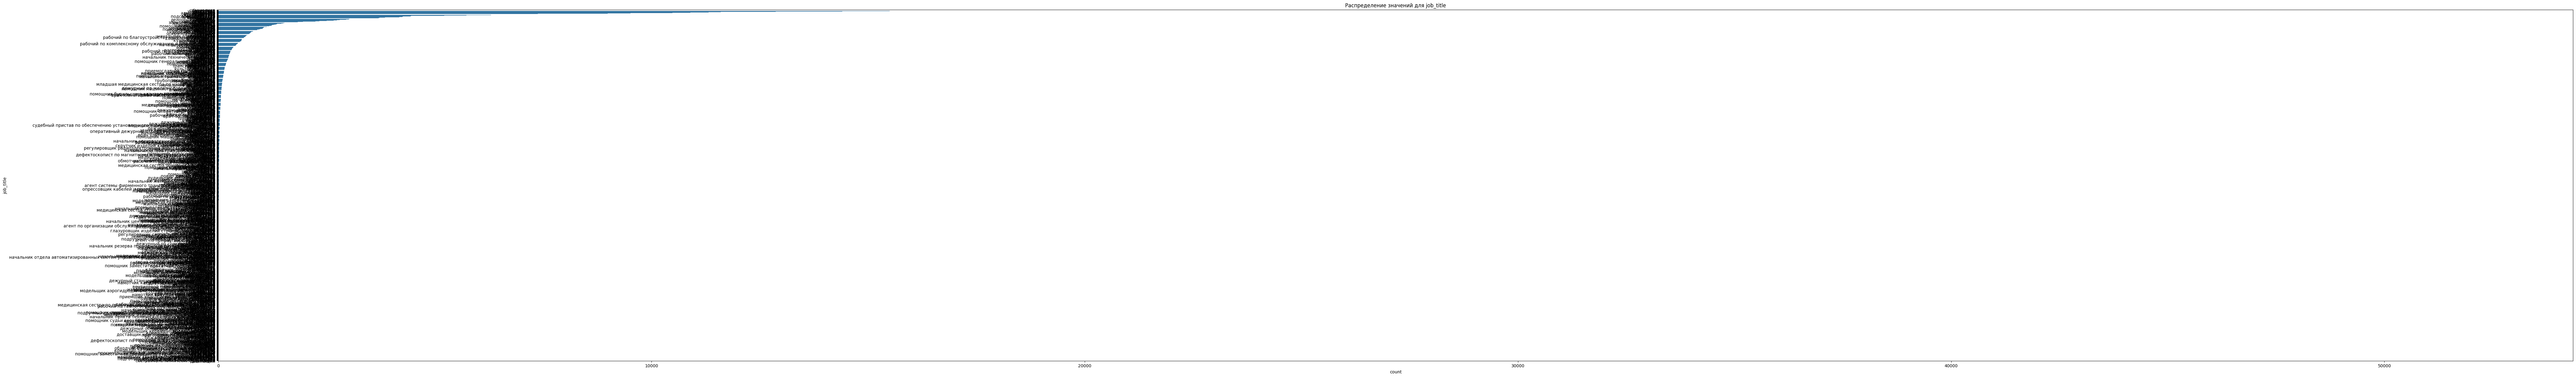


–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è company_name:
company_name
–ü–ê–û –°–±–µ—Ä–±–∞–Ω–∫                                                                                                      1574
–ò–ü                                                                                                                 795
–û–ê–û –†–ñ–î                                                                                                            704
–ü–æ—á—Ç–∞ –†–æ—Å—Å–∏–∏                                                                                                       649
–§–ì–£–ü –ü–æ—á—Ç–∞ –†–æ—Å—Å–∏–∏                                                                                                  595
                                                                                                                  ... 
–ú—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω–æ–µ –±—é–¥–∂–µ—Ç–Ω–æ–µ –æ–±—â–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç–µ–ª—å–Ω–æ–µ —É—á—Ä–µ–∂–¥–µ–Ω–∏–µ "–ù–∞—á–∞–ª—å–Ω–∞—è –æ–±—â–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç–µ–ª—å–Ω–∞

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ae3d596b1c0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ae3d596a440> (for post_execute):


KeyboardInterrupt: 

In [ ]:
categorical_columns = ['job_title', 'company_name']
for col in categorical_columns:
    print(f"\n–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è {col}:")
    print(dt[col].value_counts())
    plt.figure(figsize=(40, 25))
    sns.countplot(y=dt[col], order=dt[col].value_counts().index)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏–π –¥–ª—è {col}')
    plt.show()

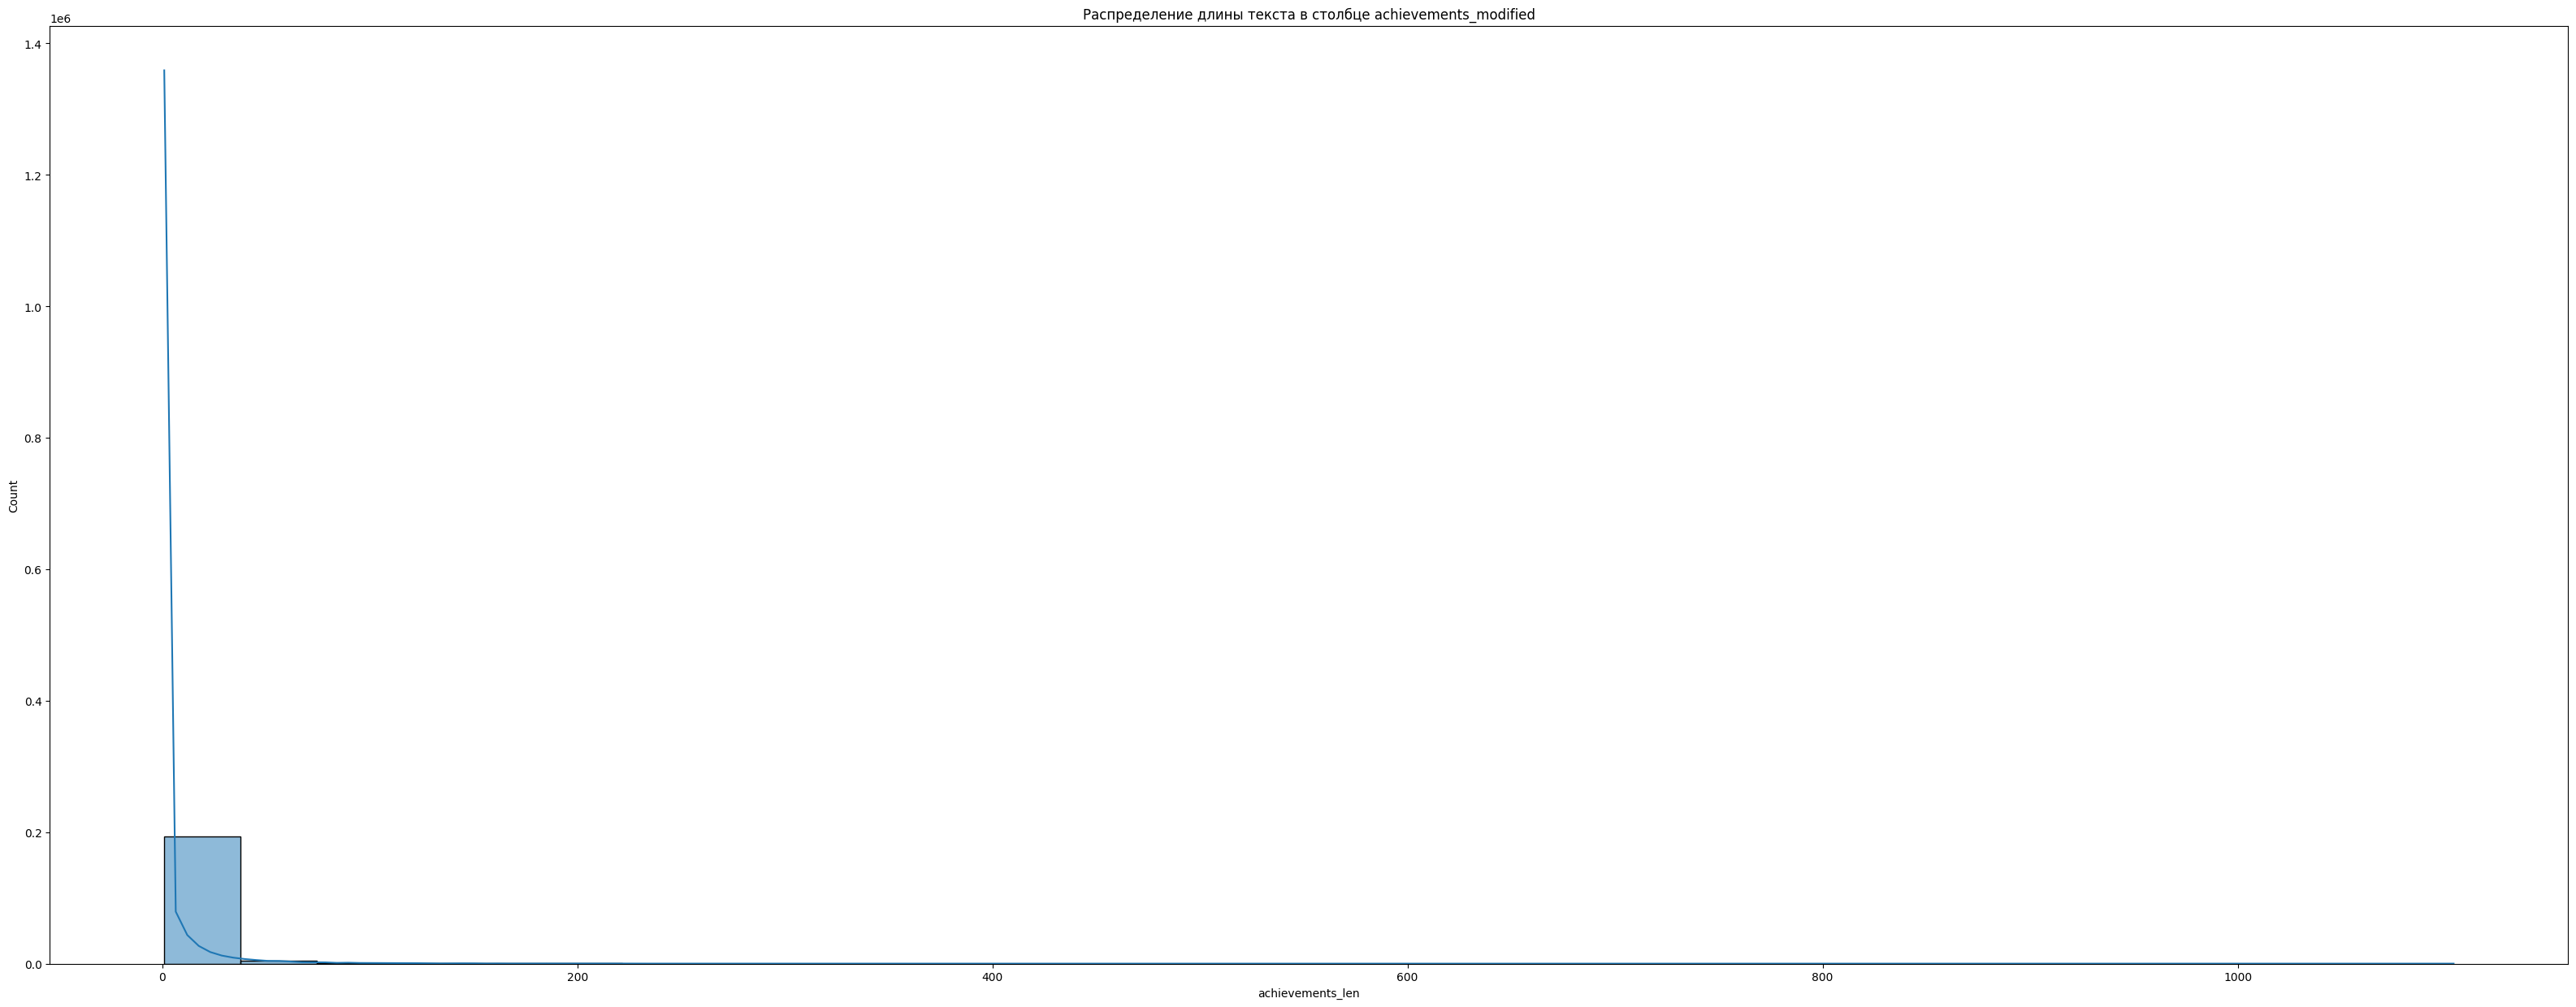

In [ ]:
dt['achievements_len'] = dt['achievements_modified'].apply(lambda x: len(str(x).split()))
dt['demands_len'] = dt['demands'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(40, 15))
sns.histplot(dt['achievements_len'], bins=30, kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–∞ –≤ —Å—Ç–æ–ª–±—Ü–µ achievements_modified')
plt.show()

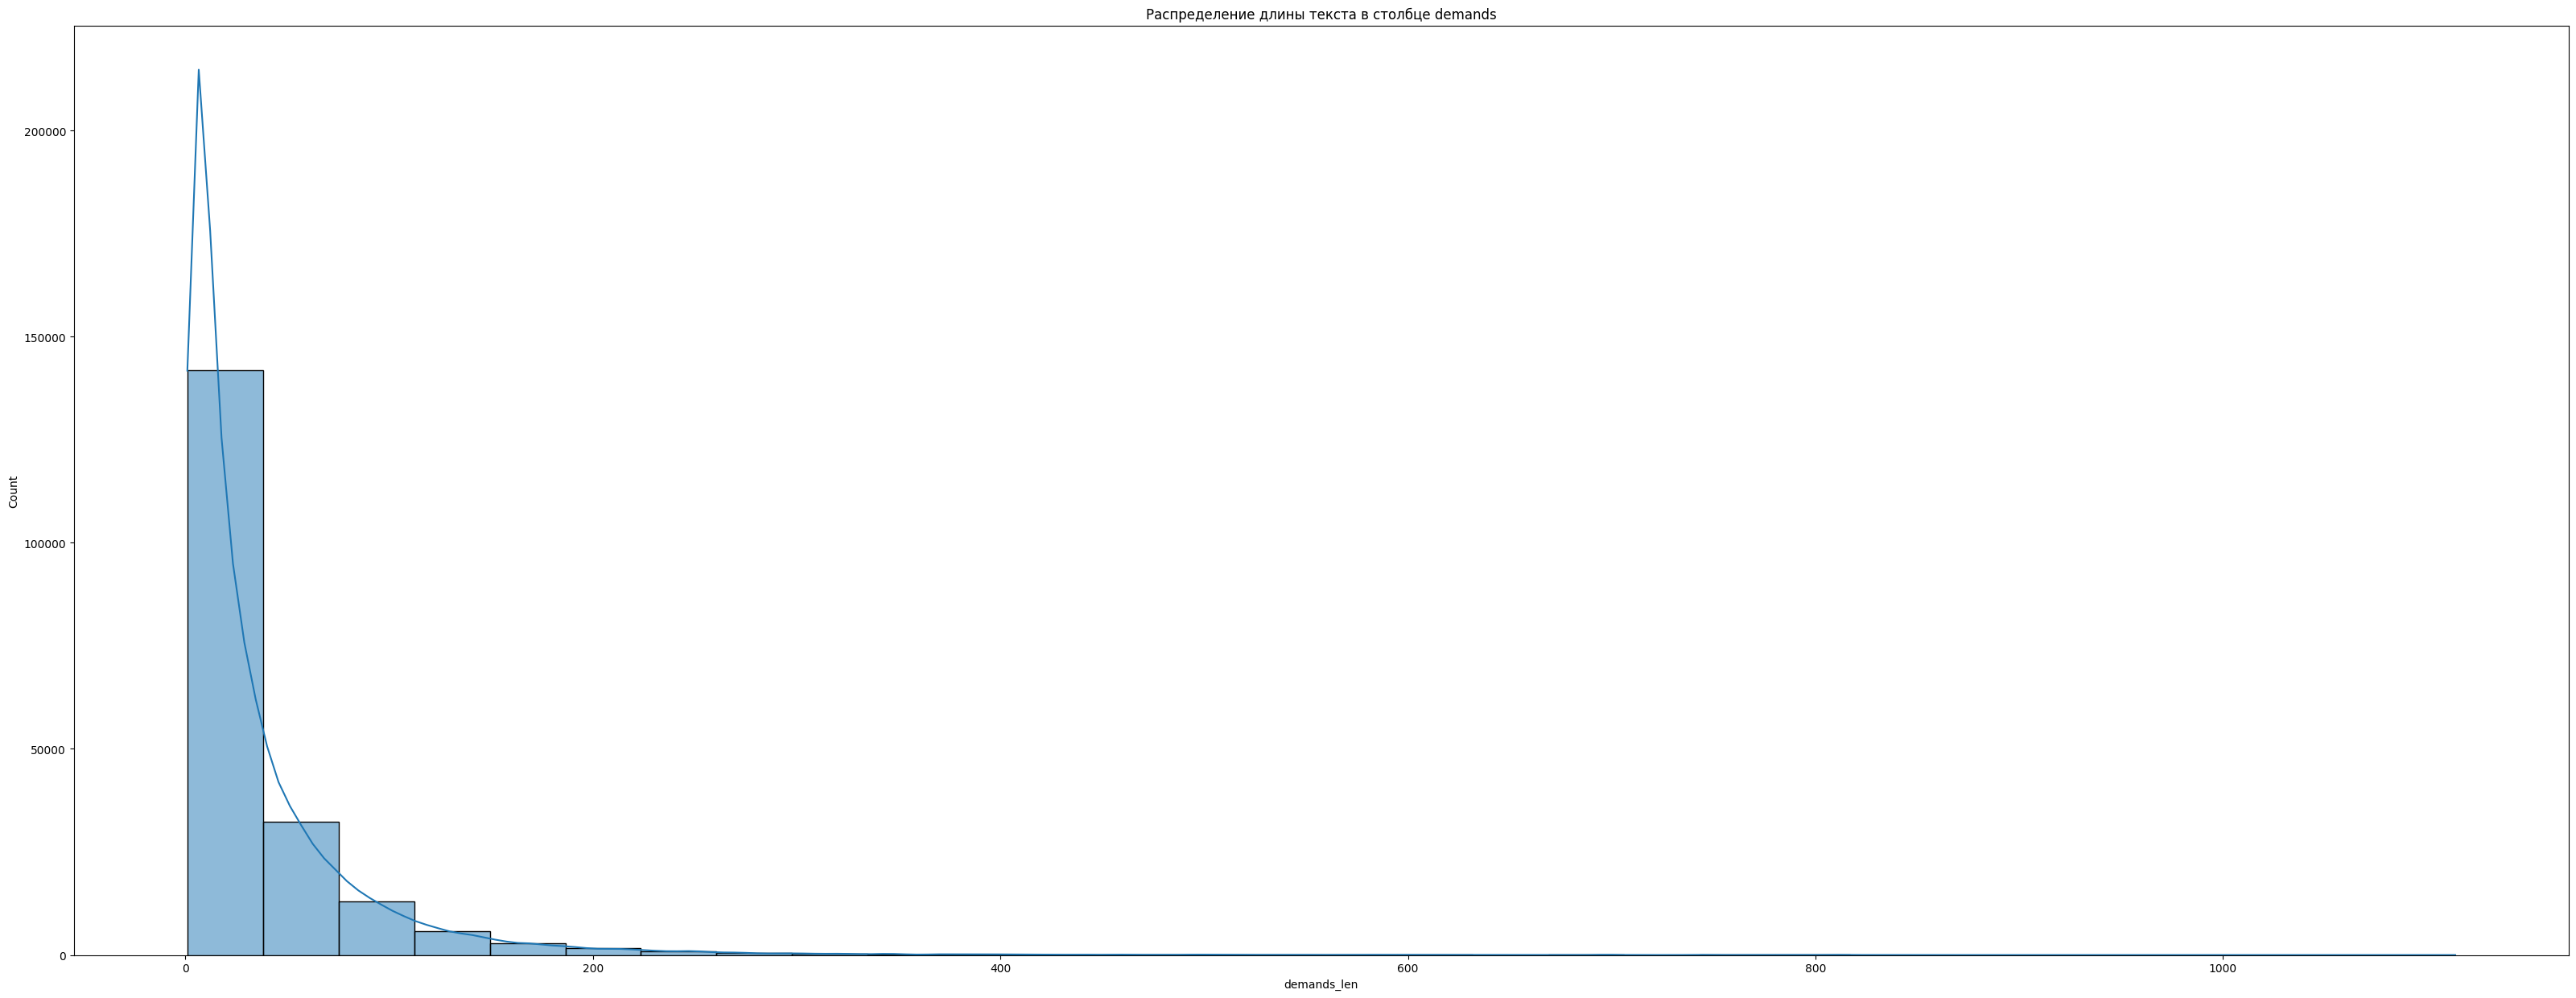

In [ ]:
plt.figure(figsize=(40, 15))
sns.histplot(dt['demands_len'], bins=30, kde=True)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω—ã —Ç–µ–∫—Å—Ç–∞ –≤ —Å—Ç–æ–ª–±—Ü–µ demands')
plt.show()

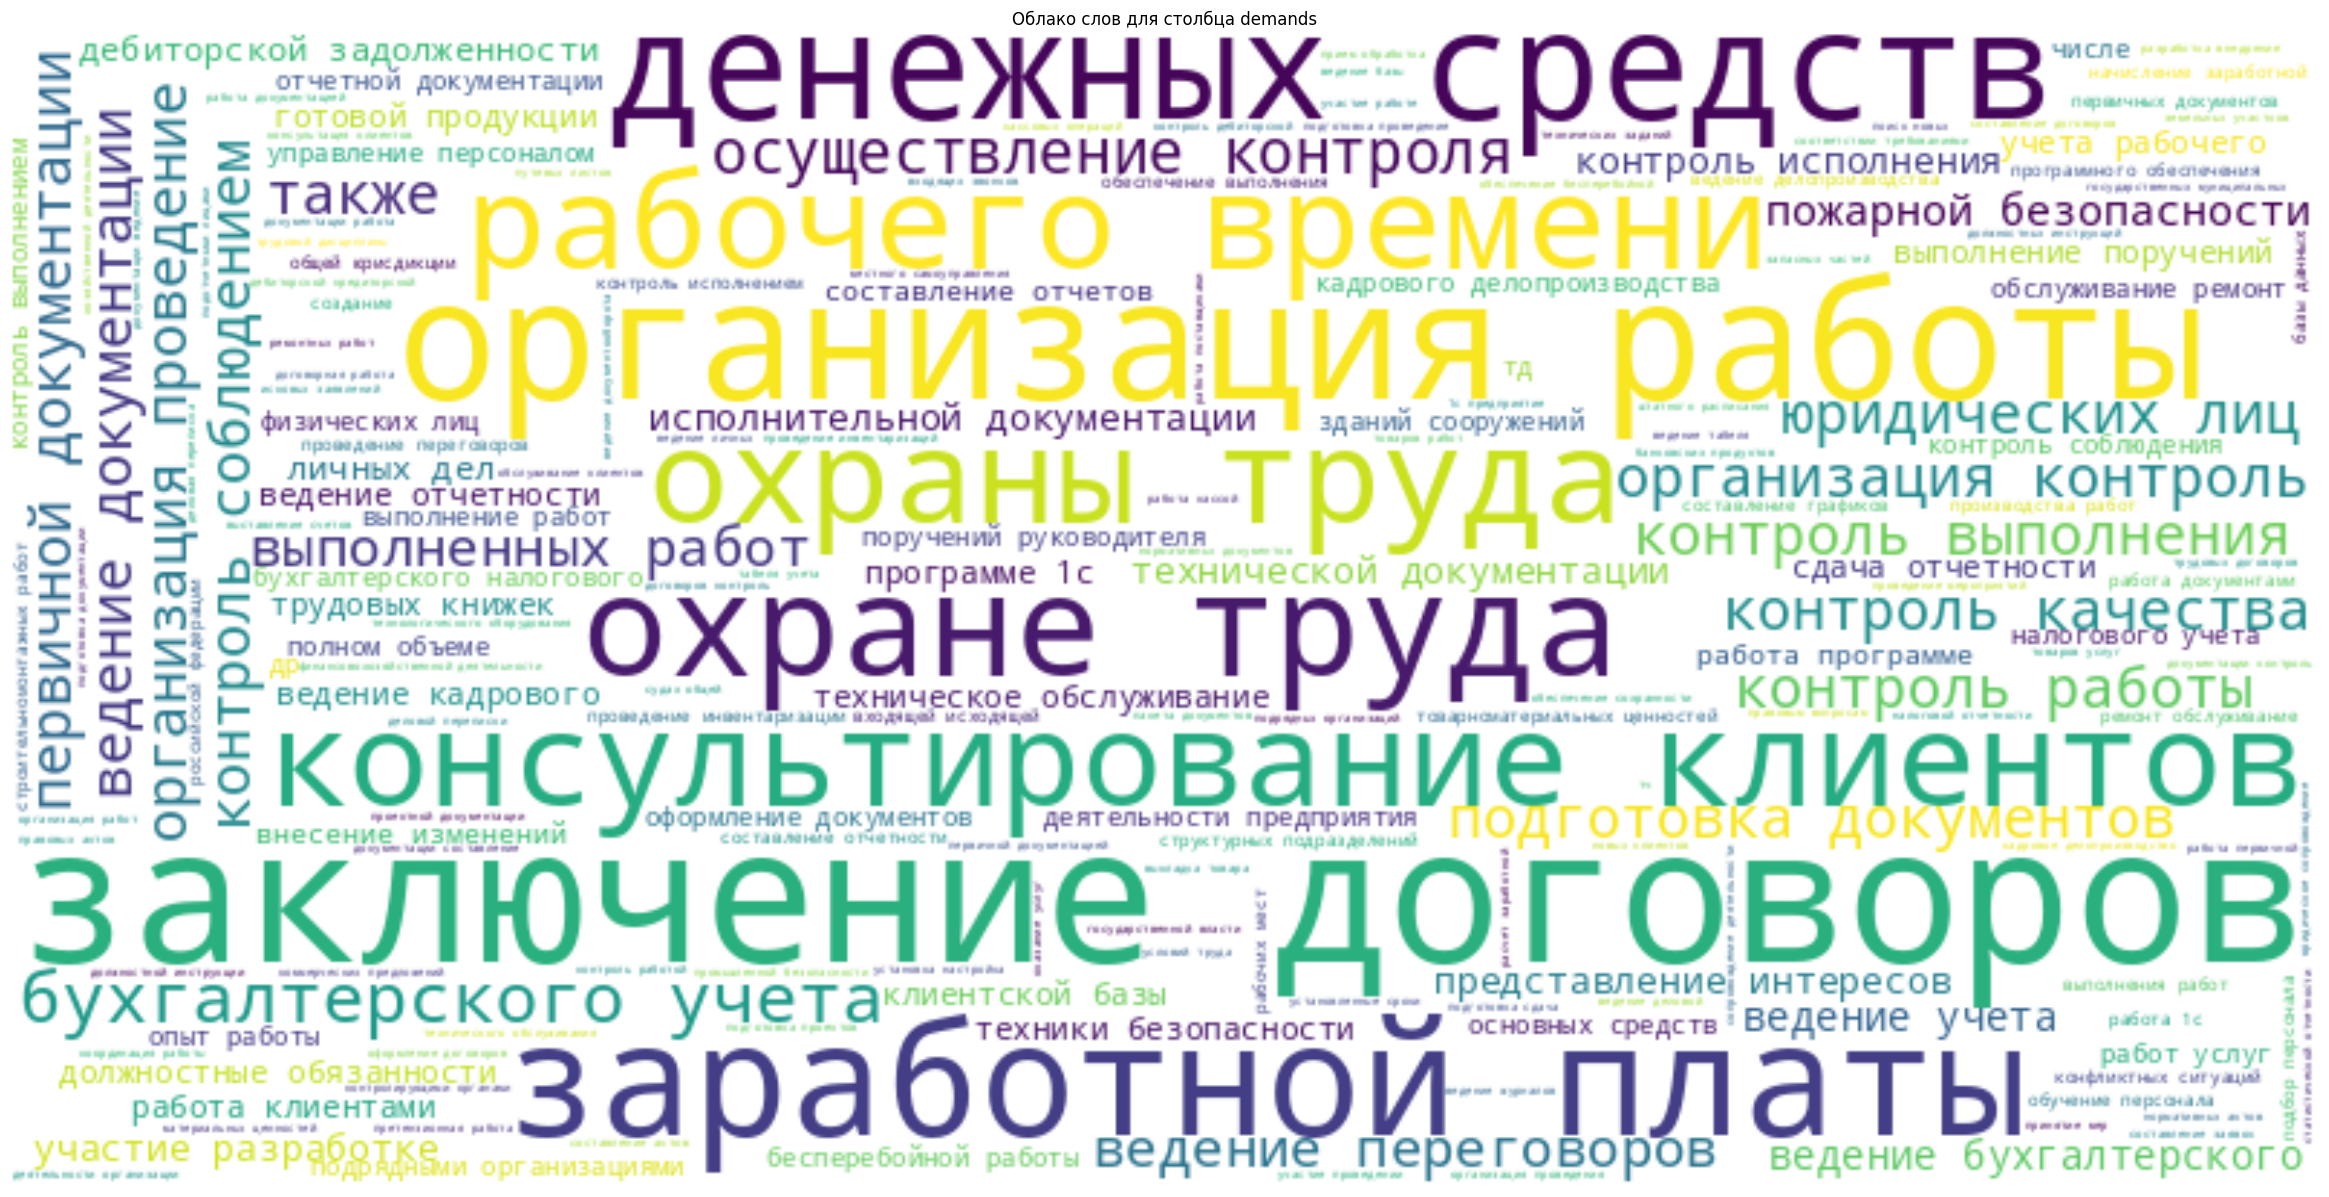

In [ ]:
all_text = ' '.join(dt['demands'].dropna().astype(str).tolist())

# –û—á–∏—Å—Ç–∏–º —Ç–µ–∫—Å—Ç –æ—Ç –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏ –∏ —Å—Ç–æ–ø-—Å–ª–æ–≤
all_text = all_text.lower().translate(str.maketrans('', '', string.punctuation))  # –£–¥–∞–ª–µ–Ω–∏–µ –ø—É–Ω–∫—Ç—É–∞—Ü–∏–∏
all_text = ' '.join([word for word in all_text.split() if word not in russian_stopwords])  # –£–¥–∞–ª–µ–Ω–∏–µ —Å—Ç–æ–ø-—Å–ª–æ–≤

# –°–æ–∑–¥–∞–¥–∏–º –æ–±—ä–µ–∫—Ç WordCloud
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_text)

# –ü–æ—Å—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –æ–±–ª–∞–∫–∞ —Å–ª–æ–≤
plt.figure(figsize=(40, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('–û–±–ª–∞–∫–æ —Å–ª–æ–≤ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ demands')
plt.show()

## Baseline solution with ruBERT

### Data preprocessing

In [8]:
target_column = 'job_title'  # –°—Ç–æ–ª–±–µ—Ü —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –¥–æ–ª–∂–Ω–æ—Å—Ç–µ–π
text_columns = ['achievements_modified', 'demands', 'company_name']  # –¢–µ–∫—Å—Ç–æ–≤—ã–µ —Å—Ç–æ–ª–±—Ü—ã

In [9]:
dt['text'] = dt[text_columns].fillna('').apply(lambda x: '. '.join(x), axis=1)

In [10]:
dt.head()

achievements  \
0                                                NaN   
1                                                NaN   
2  –†–∞–±–æ—Ç—ã –Ω–µ –∑–∞–∫–æ–Ω—á–µ–Ω—ã, —Ç.–∫. –Ω–µ—Ç –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ –∂–µ–ª–∞–Ω...   
3                                                NaN   
4                                                NaN   

                               achievements_modified  \
0                                                NaN   
1                                                NaN   
2  –†–∞–±–æ—Ç—ã –Ω–µ –∑–∞–∫–æ–Ω—á–µ–Ω—ã, —Ç.–∫. –Ω–µ—Ç –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ –∂–µ–ª–∞–Ω...   
3                                                NaN   
4                                                NaN   

                                        company_name  \
0  –£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π –∑–∞—â–∏—Ç—ã –Ω–∞—Å–µ–ª–µ–Ω–∏—è –°–µ—Ä–¥–æ–±—Å...   
1                     –ê–¥–º–∏–Ω–∏—Å—Ç—Ä–∞—Ü–∏—è –≥–æ—Ä–æ–¥–∞ –°–µ—Ä–¥–æ–±—Å–∫–∞   
2  —è–Ω–≤–∞—Ä—å 2016-–Ω–∞—Å—Ç–æ—è—â–µ–µ –≤—Ä–µ–º—è–û–û–û ¬´–ê–†–¢–ï–õ–¨ –°–¢–ê–†–ê–¢–ï...   
3  –û–ê–û ¬´–í–∞—Å–∏–ª—å–µ–≤—Å–∫–∏–π —Ä—É–¥–Ω–∏–∫¬ª, –ø.–ú–æ—Ç—ã–≥–∏–Ω–æ, –ö—Ä–∞—Å–Ω–æ—è...   
4  –û–û–û ¬´–ê—Ä—Ç–µ–ª—å —Å—Ç–∞—Ä–∞—Ç–µ–ª–µ–π ¬´–¢–ê–õ¬ª¬ª, –£—Å—Ç—å-–ù–µ—Ä–∞, –†–µ—Å–ø...   

                                             demands  \
0  –†–∞–±–æ—Ç–∞–ª–∞,–Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ, —Å —Ñ–µ–¥–µ—Ä–∞–ª—å–Ω—ã–º–∏ –ª—å–≥–æ—Ç...   
1      –†–∞–±–æ—Ç–∞ —Å —Ä–µ–µ—Å—Ç—Ä–æ–º –º—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω–æ–π —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç–∏   
2  –ö—É—Ä–∏—Ä—É—é —Ä–∞–±–æ—Ç—ã –ø–æ —Ä—É–¥–Ω–æ–º—É –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—é: —Å–æ–∞–≤—Ç–æ—Ä...   
3        –ì–†–ü. –î–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—è –∫–µ—Ä–Ω–∞ —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã—Ö —Å–∫–≤–∞–∂–∏–Ω   
4  –ü–æ–∏—Å–∫–æ–≤–æ-—Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–µ —Ä–∞–±–æ—Ç—ã –Ω–∞ –º–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏–∏ —Ä...   

                                  id_cv  job_title  \
0  52860148-26da-11e8-a184-9122a281f90e  –∏–Ω—Å–ø–µ–∫—Ç–æ—Ä   
1  52860148-26da-11e8-a184-9122a281f90e  –∏–Ω—Å–ø–µ–∫—Ç–æ—Ä   
2  e3c857b0-26a0-11e7-bcca-736ab11edb0c     –≥–µ–æ–ª–æ–≥   
3  e3c857b0-26a0-11e7-bcca-736ab11edb0c     –≥–µ–æ–ª–æ–≥   
4  e3c857b0-26a0-11e7-bcca-736ab11edb0c     –≥–µ–æ–ª–æ–≥   

                                                text  
0  . –†–∞–±–æ—Ç–∞–ª–∞,–Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ, —Å —Ñ–µ–¥–µ—Ä–∞–ª—å–Ω—ã–º–∏ –ª—å–≥...  
1  . –†–∞–±–æ—Ç–∞ —Å —Ä–µ–µ—Å—Ç—Ä–æ–º –º—É–Ω–∏—Ü–∏–ø–∞–ª—å–Ω–æ–π —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç...  
2  –†–∞–±–æ—Ç—ã –Ω–µ –∑–∞–∫–æ–Ω—á–µ–Ω—ã, —Ç.–∫. –Ω–µ—Ç –Ω–∞—Å—Ç–æ—è—â–µ–≥–æ –∂–µ–ª–∞–Ω...  
3  . –ì–†–ü. –î–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏—è –∫–µ—Ä–Ω–∞ —Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã—Ö —Å–∫–≤–∞–∂–∏–Ω....  
4  . –ü–æ–∏—Å–∫–æ–≤–æ-—Ä–∞–∑–≤–µ–¥–æ—á–Ω—ã–µ —Ä–∞–±–æ—Ç—ã –Ω–∞ –º–µ—Å—Ç–æ—Ä–æ–∂–¥–µ–Ω–∏–∏...

In [11]:
dt['text'][0]

'. –†–∞–±–æ—Ç–∞–ª–∞,–Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ, —Å —Ñ–µ–¥–µ—Ä–∞–ª—å–Ω—ã–º–∏ –ª—å–≥–æ—Ç–Ω–∏–∫–∏.–í–µ–ª–∞ –ø—Ä–∏—ë–º –≥—Ä–∞–∂–¥–∞–Ω –∫–∞–∫ –ø–æ —Ñ–µ–¥–µ—Ä–∞–ª—å–Ω—ã–º, —Ç–∞–∫ –∏ –ø–æ —Ä–µ–≥–∏–æ–Ω–∞–ª—å–Ω—ã–º –ª—å–≥–æ—Ç–∞–º.–ü—Ä–∏–µ–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤.–û–±—Ä–∞–±–æ—Ç–∫–∞ –∏ –ø–æ–¥—à–∏–≤–∫–∞ –ª–∏—á–Ω—ã—Ö –¥–µ–ª –≥—Ä–∞–∂–¥–∞–Ω.–†–∞–±–æ—Ç–∞ —Å –∫–∞—Ä—Ç–æ—Ç–µ–∫–æ–π –∏ –∞—Ä—Ö–∏–≤–æ–º. –£–ø—Ä–∞–≤–ª–µ–Ω–∏–µ —Å–æ—Ü–∏–∞–ª—å–Ω–æ–π –∑–∞—â–∏—Ç—ã –Ω–∞—Å–µ–ª–µ–Ω–∏—è –°–µ—Ä–¥–æ–±—Å–∫–æ–≥–æ —Ä–∞–π–æ–Ω–∞'

In [12]:
# –ü—Ä–µ–≤—Ä–∞—â–∞–µ–º job_title –≤ —á–∏—Å–ª–æ–≤—ã–µ –º–µ—Ç–∫–∏
dt['label'] = pd.factorize(dt[target_column])[0]  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –¥–æ–ª–∂–Ω–æ—Å—Ç–∏ –≤ —Ü–∏—Ñ—Ä—ã
num_labels = len(dt['label'].unique())  # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–ª–∞—Å—Å–æ–≤
num_labels

965

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [14]:
train_texts, val_texts, train_labels, val_labels = train_test_split(dt['text'], dt['label'], test_size=0.2, random_state=42)

In [15]:
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [16]:
train_texts = train_texts.reset_index(drop=True)
train_labels = train_labels.reset_index(drop=True)
train_texts.dropna(inplace=True)
train_labels.dropna(inplace=True)
val_texts.dropna(inplace=True)
val_labels.dropna(inplace=True)

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ –¥–ª–∏–Ω—ã
assert len(train_texts) == len(train_labels), "–ù–µ—Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Ç–µ–∫—Å—Ç–æ–≤ –∏ –º–µ—Ç–æ–∫!"

train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts.tolist(), truncation=True, padding=True, max_length=128)

In [17]:
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        self.labels = self.labels.reset_index(drop=True)
        assert len(self.labels) == len(self.encodings['input_ids']), "–ú–µ—Ç–∫–∏ –∏ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç —Ä–∞–∑–Ω—É—é –¥–ª–∏–Ω—É"

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞–ª–∏—á–∏–µ –∏–Ω–¥–µ–∫—Å–æ–≤
        assert idx < len(self.labels), f"–ò–Ω–¥–µ–∫—Å {idx} –≤–Ω–µ –¥–∏–∞–ø–∞–∑–æ–Ω–∞!"
        item = {key: torch.tensor(val[idx]).to(device) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx]).to(device)
        return item

# –°–æ–∑–¥–∞–µ–º –¥–∞—Ç–∞—Å–µ—Ç—ã
train_dataset = TextDataset(train_encodings, train_labels)
val_dataset = TextDataset(val_encodings, val_labels)

In [18]:
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer)

train_loader = DataLoader(train_dataset, batch_size=16, collate_fn=data_collator)
val_loader = DataLoader(val_dataset, batch_size=16, collate_fn=data_collator)

In [19]:
print(train_texts[:5])
print(train_labels[:5])

0    –ò–∑—É—á–∏–ª —Ç–µ—Ö–Ω–∏—á–µ—Å–∫—É—é —á–∞—Å—Ç—å –±–∞–Ω–∫–æ–º–∞—Ç–æ–≤ –∏ —Ç–µ—Ä–º–∏–Ω–∞–ª...
1    . - –ö–æ–Ω—Å—É–ª—å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤/–∑–∞—ë–º—â–∏–∫–æ–≤ –ø–æ –≤–æ–ø...
2    . &Oslash| –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ —Ö–æ–∑—è–π—Å—Ç–≤–µ–Ω–Ω–æ–π –¥–µ—è—Ç–µ–ª—å–Ω...
3    . –û–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∏ —Ä–µ–º–æ–Ω—Ç –¥–æ–º–æ–≤—ã—Ö –∏ –ø—Ä–∏–¥–æ–º–æ–≤—ã—Ö —Ç...
4    . –†–∞–±–æ—Ç–∞ –Ω–∞ –í—Å–µ—Ä–æ—Å—Å–∏–π—Å–∫–æ–π —Å—Ç—É–¥–µ–Ω—á–µ—Å–∫–æ–π —Å—Ç—Ä–æ–π–∫–∏...
Name: text, dtype: object
0    280
1     70
2     53
3    686
4     20
Name: label, dtype: int64


In [20]:
assert len(train_encodings['input_ids']) == len(train_labels), "–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç–æ–∫–µ–Ω–æ–≤ –Ω–µ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –º–µ—Ç–æ–∫!"

In [21]:
model = BertForSequenceClassification.from_pretrained('cointegrated/rubert-tiny2', num_labels=num_labels)
model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cointegrated/rubert-tiny2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-

In [22]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ–±—É—á–µ–Ω–∏—è
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator
)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(


TrainOutput(global_step=30000, training_loss=2.7754307657877604, metrics={'train_runtime': 1960.7872, 'train_samples_per_second': 244.8, 'train_steps_per_second': 15.3, 'total_flos': 996019937280000.0, 'train_loss': 2.7754307657877604, 'epoch': 3.0})

In [23]:
model.eval()

all_preds = []
all_labels = []

# –ü—Ä–æ—Ö–æ–¥–∏–º –ø–æ –≤–∞–ª–∏–¥–∞—Ü–∏–æ–Ω–Ω—ã–º –¥–∞–Ω–Ω—ã–º
with torch.no_grad():
    for batch in tqdm(val_loader):
        # –ó–∞–≥—Ä—É–∂–∞–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–æ (GPU/CPU)
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # –ü–æ–ª—É—á–∞–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –ª–æ–≥–∏—Ç—ã –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã–µ –º–µ—Ç–∫–∏
        preds = torch.argmax(logits, dim=-1)

        # –°–æ–±–∏—Ä–∞–µ–º –≤—Å–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –∏ —Ä–µ–∞–ª—å–Ω—ã–µ –º–µ—Ç–∫–∏ –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–π –æ—Ü–µ–Ω–∫–∏
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# –í—ã—á–∏—Å–ª—è–µ–º F1-score
f1 = f1_score(all_labels, all_preds, average='weighted')
print(f"F1-score: {f1}")

  0%|          | 0/2500 [00:00<?, ?it/s]

F1-score: 0.3898622073062369


In [ ]:
save_path = '/content/drive/MyDrive/bert_model'

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä–∞
model.save_pretrained(save_path)
tokenizer.save_pretrained(save_path)
print(f"–ú–æ–¥–µ–ª—å –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã –ø–æ –ø—É—Ç–∏: {save_path}")